# Heap

La structure *heap* ou [tas](https://fr.wikipedia.org/wiki/Tas_(informatique)) en français est utilisée pour trier. Elle peut également servir à obtenir les *k* premiers éléments d'une liste.

Un tas est peut être considéré comme un tableau $T$ qui vérifie une condition assez simple, pour tout indice $i$, alors $T[i] \geqslant \max(T[2i+1], T[2i+2])$. On en déduit nécessairement que le premier élément du tableau est le plus grand. Maintenant comment transformer un tableau en un autre qui respecte cette contrainte ?

In [22]:
%matplotlib inline

## Transformer en tas

In [23]:
def swap(tab, i, j):
    "Echange deux éléments."
    tab[i], tab[j] = tab[j], tab[i]


def entas(heap):
    "Organise un ensemble selon un tas."
    modif = 1
    while modif > 0:
        modif = 0
        i = len(heap) - 1
        while i > 0:
            root = (i - 1) // 2
            if heap[root] < heap[i]:
                swap(heap, root, i)
                modif += 1
            i -= 1
    return heap


ens = [1, 2, 3, 4, 7, 10, 5, 6, 11, 12, 3]
entas(ens)

[12, 11, 5, 10, 7, 3, 1, 6, 4, 3, 2]

Comme ce n'est pas facile de vérifer que c'est un tas, on le dessine.

## Dessiner un tas

<Axes: >

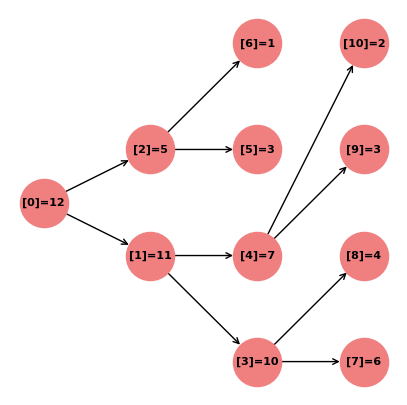

In [24]:
import networkx as nx
import matplotlib.pyplot as plt


def dessine_tas(heap):
    G = nx.Graph()

    for i, v in enumerate(heap):
        if i * 2 + 1 < len(heap):
            G.add_edge(f"[{i}]={heap[i]}", f"[{i * 2 + 1}]={heap[i * 2 + 1]}")
            if i * 2 + 2 < len(heap):
                G.add_edge(f"[{i}]={heap[i]}", f"[{i * 2 + 2}]={heap[i * 2 + 2]}")

    fig, ax = plt.subplots(figsize=(5, 5))
    pos = nx.bfs_layout(G, start=f"[0]={heap[0]}")
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="lightcoral",
        node_size=1200,
        font_size=8,
        font_weight="bold",
        arrows=True,
        arrowstyle="->",
        ax=ax,
    )
    return ax


dessine_tas(entas(ens))

Le nombre entre crochets est la position, l'autre nombre est la valeur à cette position. Cette représentation fait apparaître une structure d'arbre binaire.

## Première version

In [25]:
def swap(tab, i, j):
    "Echange deux éléments."
    tab[i], tab[j] = tab[j], tab[i]


def _heapify_max_bottom(heap):
    "Organise un ensemble selon un tas."
    modif = 1
    while modif > 0:
        modif = 0
        i = len(heap) - 1
        while i > 0:
            root = (i - 1) // 2
            if heap[root] < heap[i]:
                swap(heap, root, i)
                modif += 1
            i -= 1


def _heapify_max_up(heap):
    "Organise un ensemble selon un tas."
    i = 0
    while True:
        left = 2 * i + 1
        right = left + 1
        if right < len(heap):
            if heap[left] > heap[i] >= heap[right]:
                swap(heap, i, left)
                i = left
            elif heap[right] > heap[i]:
                swap(heap, i, right)
                i = right
            else:
                break
        elif left < len(heap) and heap[left] > heap[i]:
            swap(heap, i, left)
            i = left
        else:
            break


def topk_min(ens, k):
    "Retourne les k plus petits éléments d'un ensemble."

    heap = ens[:k]
    _heapify_max_bottom(heap)

    for el in ens[k:]:
        if el < heap[0]:
            heap[0] = el
            _heapify_max_up(heap)
    return heap


ens = [1, 2, 3, 4, 7, 10, 5, 6, 11, 12, 3]
for k in range(1, len(ens) - 1):
    print(k, topk_min(ens, k))

1 [1]
2 [2, 1]
3 [3, 2, 1]
4 [3, 3, 1, 2]
5 [4, 3, 1, 3, 2]
6 [5, 4, 3, 3, 2, 1]
7 [5, 6, 3, 4, 2, 3, 1]
8 [5, 7, 3, 6, 2, 3, 1, 4]
9 [5, 10, 3, 7, 2, 3, 1, 6, 4]


## Même chose avec les indices au lieu des valeurs

In [26]:
def _heapify_max_bottom_position(ens, pos):
    "Organise un ensemble selon un tas."
    modif = 1
    while modif > 0:
        modif = 0
        i = len(pos) - 1
        while i > 0:
            root = (i - 1) // 2
            if ens[pos[root]] < ens[pos[i]]:
                swap(pos, root, i)
                modif += 1
            i -= 1


def _heapify_max_up_position(ens, pos):
    "Organise un ensemble selon un tas."
    i = 0
    while True:
        left = 2 * i + 1
        right = left + 1
        if right < len(pos):
            if ens[pos[left]] > ens[pos[i]] >= ens[pos[right]]:
                swap(pos, i, left)
                i = left
            elif ens[pos[right]] > ens[pos[i]]:
                swap(pos, i, right)
                i = right
            else:
                break
        elif left < len(pos) and ens[pos[left]] > ens[pos[i]]:
            swap(pos, i, left)
            i = left
        else:
            break


def topk_min_position(ens, k):
    "Retourne les positions des k plus petits éléments d'un ensemble."

    pos = list(range(k))
    _heapify_max_bottom_position(ens, pos)

    for i, el in enumerate(ens[k:]):
        if el < ens[pos[0]]:
            pos[0] = k + i
            _heapify_max_up_position(ens, pos)
    return pos


ens = [1, 2, 3, 7, 10, 4, 5, 6, 11, 12, 3]
for k in range(1, len(ens) - 1):
    pos = topk_min_position(ens, k)
    print(k, pos, [ens[i] for i in pos])

1 [0] [1]
2 [1, 0] [2, 1]
3 [2, 1, 0] [3, 2, 1]
4 [10, 2, 0, 1] [3, 3, 1, 2]
5 [5, 10, 0, 2, 1] [4, 3, 1, 3, 2]
6 [6, 5, 2, 10, 1, 0] [5, 4, 3, 3, 2, 1]
7 [5, 7, 10, 6, 1, 2, 0] [4, 6, 3, 5, 2, 3, 1]
8 [5, 3, 10, 7, 1, 2, 0, 6] [4, 7, 3, 6, 2, 3, 1, 5]
9 [5, 4, 10, 3, 1, 2, 0, 7, 6] [4, 10, 3, 7, 2, 3, 1, 6, 5]


In [27]:
import numpy.random as rnd

X = rnd.randn(10000)

%timeit topk_min(X, 20)

1.15 ms ± 73.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
%timeit topk_min_position(X, 20)

1.3 ms ± 27 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Coût de l'algorithme

In [29]:
from tqdm import tqdm
from pandas import DataFrame
from teachpyx.ext_test_case import measure_time

rows = []
for n in tqdm(list(range(1000, 20001, 1000))):
    X = rnd.randn(n)
    res = measure_time(
        "topk_min_position(X, 100)",
        {"X": X, "topk_min_position": topk_min_position},
        div_by_number=True,
        number=10,
    )
    res["size"] = n
    rows.append(res)

df = DataFrame(rows)
df.head()

100%|██████████| 20/20 [00:04<00:00,  4.36it/s]


,average,deviation,min_exec,max_exec,repeat,number,ttime,context_size,warmup_time,size
0,0.000936,0.000545,0.000417,0.002053,10,10,0.009363,184,0.001808,1000
1,0.000846,0.000243,0.000593,0.001176,10,10,0.008458,184,0.000567,2000
2,0.001052,0.000698,0.000661,0.002505,10,10,0.010521,184,0.001720,3000
3,0.001355,0.000407,0.000940,0.001972,10,10,0.013552,184,0.000966,4000
4,0.001157,0.000332,0.000944,0.001844,10,10,0.011573,184,0.001753,5000


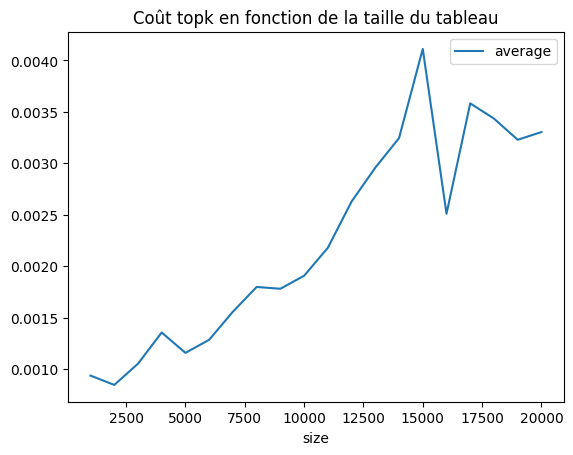

In [30]:
import matplotlib.pyplot as plt

df[["size", "average"]].set_index("size").plot()
plt.title("Coût topk en fonction de la taille du tableau");

A peu près linéaire comme attendu.

In [31]:
from tqdm import tqdm
from teachpyx.ext_test_case import measure_time

rows = []
X = rnd.randn(10000)
for k in tqdm(list(range(500, 2001, 150))):
    res = measure_time(
        "topk_min_position(X, k)",
        {"X": X, "topk_min_position": topk_min_position, "k": k},
        div_by_number=True,
        number=5,
    )
    res["k"] = k
    rows.append(res)

df = DataFrame(rows)
df.head()

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:03<00:00,  3.30it/s]


,average,deviation,min_exec,max_exec,repeat,number,ttime,context_size,warmup_time,k
0,0.003371,0.000490,0.003056,0.004701,10,5,0.033712,184,0.008233,500
1,0.004981,0.001537,0.003584,0.007546,10,5,0.049812,184,0.003769,650
2,0.005043,0.001202,0.004029,0.007892,10,5,0.050429,184,0.003999,800
3,0.005430,0.000759,0.004515,0.006904,10,5,0.054297,184,0.007590,950
4,0.006422,0.001376,0.004506,0.009072,10,5,0.064225,184,0.009276,1100


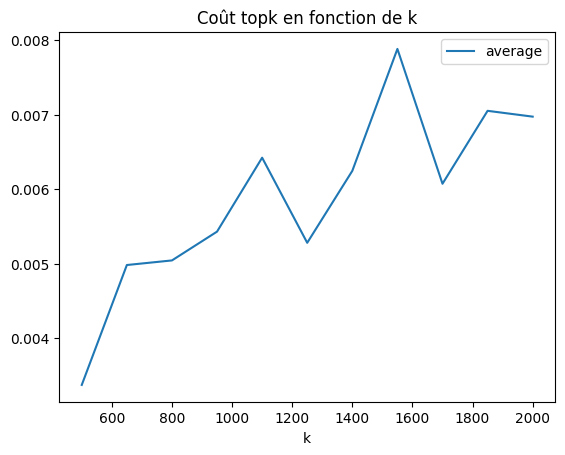

In [32]:
df[["k", "average"]].set_index("k").plot()
plt.title("Coût topk en fonction de k");

Pas évident, au pire en $O(n\ln n)$, au mieux en $O(n)$.

## Version simplifiée

A-t-on vraiment besoin de `_heapify_max_bottom_position` ?

In [33]:
def _heapify_max_up_position_simple(ens, pos, first):
    "Organise un ensemble selon un tas."
    i = first
    while True:
        left = 2 * i + 1
        right = left + 1
        if right < len(pos):
            if ens[pos[left]] > ens[pos[i]] >= ens[pos[right]]:
                swap(pos, i, left)
                i = left
            elif ens[pos[right]] > ens[pos[i]]:
                swap(pos, i, right)
                i = right
            else:
                break
        elif left < len(pos) and ens[pos[left]] > ens[pos[i]]:
            swap(pos, i, left)
            i = left
        else:
            break


def topk_min_position_simple(ens, k):
    "Retourne les positions des k plus petits éléments d'un ensemble."

    pos = list(range(k))
    pos[k - 1] = 0

    for i in range(1, k):
        pos[k - i - 1] = i
        _heapify_max_up_position_simple(ens, pos, k - i - 1)

    for i, el in enumerate(ens[k:]):
        if el < ens[pos[0]]:
            pos[0] = k + i
            _heapify_max_up_position_simple(ens, pos, 0)
    return pos


ens = [1, 2, 3, 7, 10, 4, 5, 6, 11, 12, 3]
for k in range(1, len(ens) - 1):
    pos = topk_min_position_simple(ens, k)
    print(k, pos, [ens[i] for i in pos])

1 [0] [1]
2 [1, 0] [2, 1]
3 [2, 1, 0] [3, 2, 1]
4 [10, 2, 1, 0] [3, 3, 2, 1]
5 [5, 10, 2, 1, 0] [4, 3, 3, 2, 1]
6 [5, 6, 10, 2, 1, 0] [4, 5, 3, 3, 2, 1]
7 [6, 7, 10, 5, 2, 1, 0] [5, 6, 3, 4, 3, 2, 1]
8 [5, 4, 10, 7, 6, 2, 1, 0] [4, 10, 3, 6, 5, 3, 2, 1]
9 [3, 4, 6, 5, 7, 10, 2, 1, 0] [7, 10, 5, 4, 6, 3, 3, 2, 1]


In [34]:
X = rnd.randn(10000)

%timeit topk_min_position_simple(X, 20)

1.42 ms ± 39.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
